In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Clean up the data

In [2]:
data = pd.read_excel('Televisions.xls')

In [3]:
data = data.drop(index=0)
data = data.drop(index=1)
data = data.drop(index=2)

In [4]:
data = data.reset_index(drop=True)
data.head()

,Country,Life,People per,People per.1,Female Life,Male Life
0,Argentina,70.5,4,370,74,67
1,Bangladesh,53.5,315,6166,53,54
2,Brazil,65,4,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70,8,643,72,68


In [5]:
data = data.drop(index=40)
data = data.drop(index=41)
data = data.drop(index=42)

In [6]:
data.tail()

,Country,Life,People per,People per.1,Female Life,Male Life
35,United Kingdom,76,3,611,79,73
36,United States,75.5,1.3,404,79,72
37,Venezuela,74.5,5.6,576,78,71
38,Vietnam,65,29,3096,67,63
39,Zaire,54,*,23193,56,52


In [7]:
data.columns = ['country', 'life exp', 'people per tv', 'people per doctor', 'female life exp', 'male life exp']

In [8]:
data.head()

,country,life exp,people per tv,people per doctor,female life exp,male life exp
0,Argentina,70.5,4,370,74,67
1,Bangladesh,53.5,315,6166,53,54
2,Brazil,65,4,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70,8,643,72,68


In [9]:
data.isnull()

,country,life exp,people per tv,people per doctor,female life exp,male life exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


## 2. EDA
##### So I want to find out the relationship between ....
- life expectancy -- people per tv
- life expectancy -- people per doctor
- female vs male life expectancy in each countries

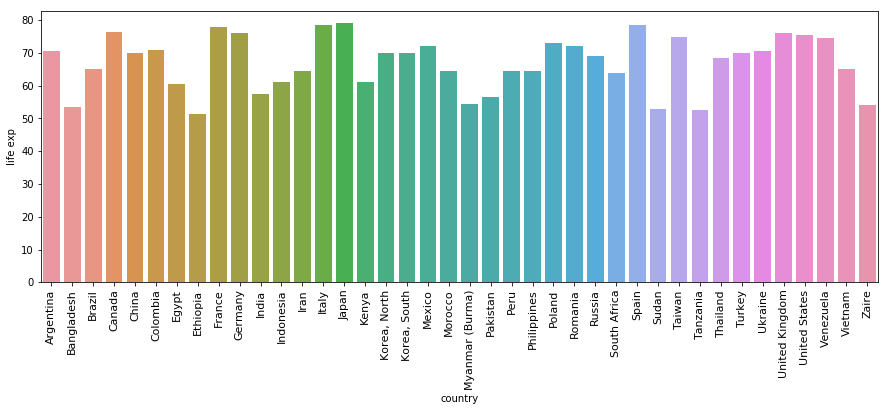

In [10]:
# Life expectancy of each countries

plt.figure(figsize=(15,5))
ticks = data.country.values
ax = sns.barplot(data=data, x='country', y='life exp')
ax.set_xticklabels(ticks, rotation=90, fontsize=11)
plt.show()

In [11]:
data = data.replace('*', 0)

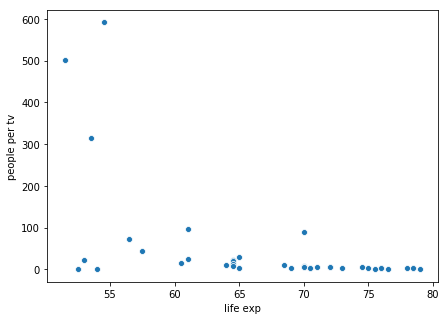

In [12]:
# Life expectancy VS people per tv
plt.figure(figsize=(7,5))
sns.scatterplot(x='life exp', y='people per tv', data=data)

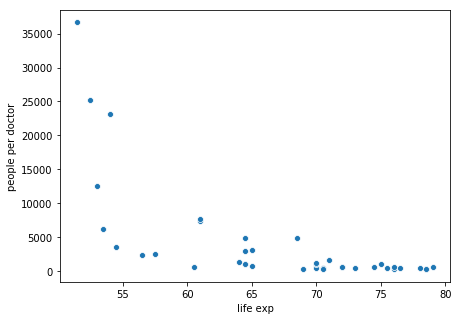

In [13]:
# Life expectancy VS people per doctor
plt.figure(figsize=(7,5))
sns.scatterplot(x='life exp', y='people per doctor', data=data)

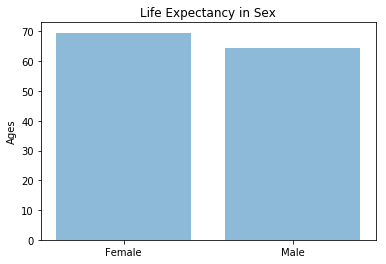

In [14]:
# Female VS male life expectancy
# What type of graph can I use? Maybe I can find average of male/female life expectnacy average and compare.

fm_life = data['female life exp'].mean()
m_life = data['male life exp'].mean()

names = ['Female', 'Male']
y_pos = np.arange(len(names))
life_exp = [fm_life, m_life]

plt.bar(y_pos, life_exp, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Ages')
plt.title('Life Expectancy in Sex')

plt.show()

In [15]:
# Opposed to my expectation, female has a higher life expectancy than male.

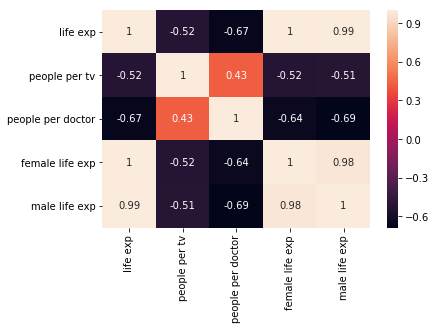

In [16]:
sns.heatmap(data.corr(), annot=True)

In [17]:
# Negative correlation means, when one variable is high, the other is low.
# Therefore, it shows that lower the life expectancy with more people per doctor, which means when there are less doctors,
# life expectancy decreases.